<a href="https://colab.research.google.com/github/ko-syo-noyome/Numpy/blob/main/train_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import random
from keras.preprocessing import image
import math
from datetime import datetime
import json

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
baseDir = "/content/drive/MyDrive/ddf-inline-quality-main"
data_dir = baseDir + "/ddf-inline-quality-main-created-train-images"
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*.jpg')))
print(image_count)

img_width = 100
img_height = 100

0


In [ ]:
batch_size = 32 # standard 32
validation_split = 0.2 # standard 0.2
seed = 1 # always the same value is needed for reproducable results

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory=data_dir,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size
  )

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  directory=data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AUTOTUNE = tf.data.AUTOTUNE

class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)

# val_ds = val_ds.shuffle(1500)
# val_ds = val_ds.take(8)

# train_ds_no_pictures = batch_size * tf.data.experimental.cardinality(train_ds).numpy()
# train_ds_no_pictures = min(train_ds_no_pictures, image_count*(1-validation_split))
# print(f'no pictures in train_ds: {train_ds_no_pictures}')

# val_ds_no_pictures = batch_size * tf.data.experimental.cardinality(val_ds).numpy()
# val_ds_no_pictures = min(val_ds_no_pictures, image_count*validation_split)
# print(f'no pictures in val_ds: {val_ds_no_pictures}')

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 1177 files belonging to 5 classes.
Using 942 files for training.
Found 1177 files belonging to 5 classes.
Using 235 files for validation.
['Heavy_Duty_Axle_ok', 'Standard_Axle_ok', 'Undercarriage_OK', 'Undercarriage_OneGrill_Missing', 'Undercarriage_TurnTable_Missing']


In [ ]:
# only visualizing the data

#import matplotlib.pyplot as plt
#print(train_ds_no_pictures)

#plt.figure(figsize=(100, 100))
#for images, labels in train_ds:
#  for i in range(int(math.ceil(train_ds_no_pictures))):
#    ax = plt.subplot(10, 5, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(img_height, img_width, 3))
  # layers.experimental.preprocessing.RandomRotation(0.1), # disabled because image rotation is fixed due to cropping
  # layers.experimental.preprocessing.RandomZoom(0.1), # disabled because size is fixed due to cropping
])

print('-----')
model = None
print(model)
print('-----')

model = Sequential([
    data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

-----
None
-----
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 150, 150, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3

In [ ]:
epochs = 100

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  shuffle=True
)

Epoch 1/100
30/30 [==============================] - 305s 8s/step - loss: 0.3927 - accuracy: 0.8493 - val_loss: 0.2283 - val_accuracy: 0.9277
Epoch 2/100
30/30 [==============================] - 19s 640ms/step - loss: 0.1095 - accuracy: 0.9607 - val_loss: 0.1574 - val_accuracy: 0.9319
Epoch 3/100
30/30 [==============================] - 19s 640ms/step - loss: 0.0619 - accuracy: 0.9766 - val_loss: 0.1102 - val_accuracy: 0.9532
Epoch 4/100
30/30 [==============================] - 19s 639ms/step - loss: 0.0429 - accuracy: 0.9862 - val_loss: 0.0527 - val_accuracy: 0.9872
Epoch 5/100
30/30 [==============================] - 19s 639ms/step - loss: 0.0268 - accuracy: 0.9926 - val_loss: 0.0872 - val_accuracy: 0.9660
Epoch 6/100
30/30 [==============================] - 19s 639ms/step - loss: 0.0156 - accuracy: 0.9968 - val_loss: 0.0567 - val_accuracy: 0.9915
Epoch 7/100
30/30 [==============================] - 19s 639ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0577 - val_accuracy: 0

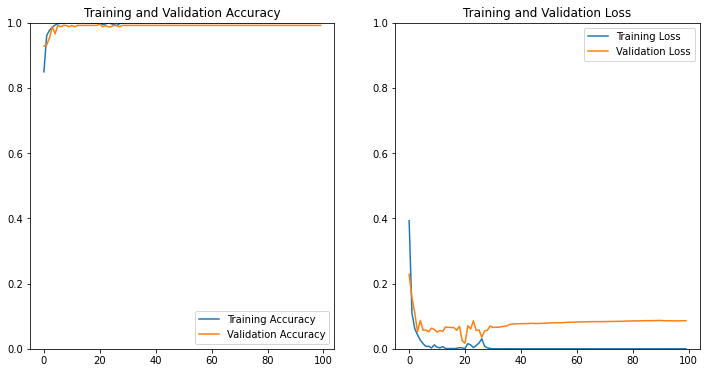

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1))

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,0,1))

plt.show()

In [ ]:
# SAVE MODEL

modelDir = baseDir + "/model_" + datetime.now().strftime('%Y%m%d-%H%M%S')

model.save(modelDir)

print(class_names)

f = open(modelDir + "/class_names.txt", "w")
f.write(json.dumps(class_names))
f.close()

INFO:tensorflow:Assets written to: /content/drive/MyDrive/ddf-inline-quality-main/model_20210913-033431/assets
['Heavy_Duty_Axle_ok', 'Standard_Axle_ok', 'Undercarriage_OK', 'Undercarriage_OneGrill_Missing', 'Undercarriage_TurnTable_Missing']


In [ ]:
# READ MODEL

modelDir = baseDir + "/model_20210827-065650"

model = keras.models.load_model(modelDir)

f = open(modelDir + "/class_names.txt", "r")
class_names = json.loads(f.read())
print(class_names)


['Heavy_Duty_Axle_ok', 'Standard_Axle_ok']


0:00:00.339808
0:00:00.001100
0:00:00.146815
[[-11.567174   9.175204]]
0:00:00.233790
0:00:00.001333
0:00:00.050514
[[  8.84543  -11.502592]]
0:00:00.237479
0:00:00.001371
0:00:00.050775
[[-10.512323   8.431387]]
0:00:00.001078
0:00:00.000689
0:00:00.049570
[[  8.84543  -11.502592]]
0:00:00.001025
0:00:00.000657
0:00:00.050683
[[-10.512323   8.431387]]
0:00:00.001270
0:00:00.001181
0:00:00.048601
[[  8.84543  -11.502592]]


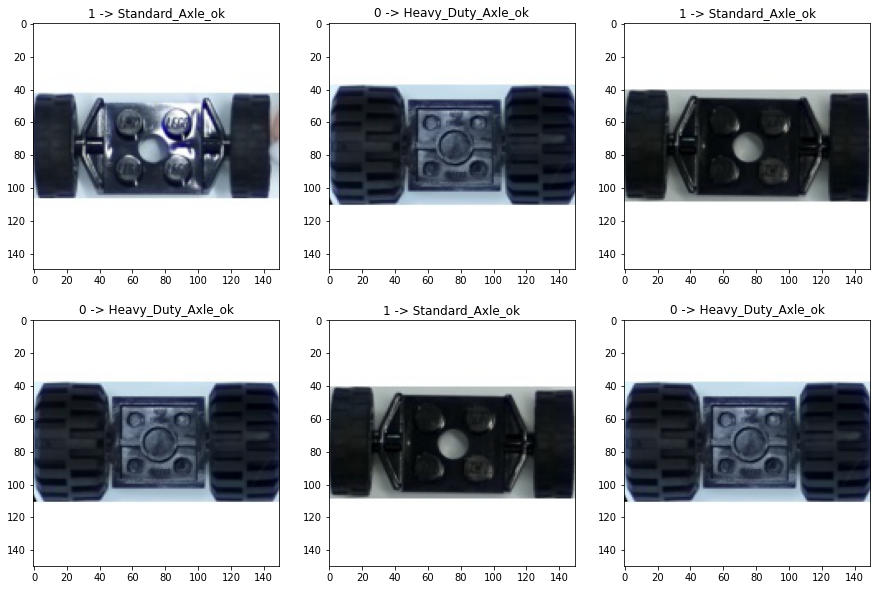

In [ ]:
manual_test_dir = baseDir + "/model_20210827-065650/assets/"

fig=plt.figure(figsize=(15, 10))
axes=[]

count = 6
cols = 3

for i in range(count):

  selectedImg = random.choice(os.listdir(manual_test_dir))
  # print(selectedImg)

  # start timestamp
  savedTime = datetime.now()

  image = tf.keras.preprocessing.image.load_img(manual_test_dir + selectedImg)

  # stop & start timestamp
  print(datetime.now() - savedTime)
  savedTime = datetime.now()

  input_arr = keras.preprocessing.image.img_to_array(image) # image to array

  # stop & start timestamp
  print(datetime.now() - savedTime)
  savedTime = datetime.now()

  # predict single image
  predictions = model.predict(np.array([input_arr]))

  # stop timestamp
  print(datetime.now() - savedTime)

  print(predictions)
  y_classes = predictions.argmax(axis=-1)
  # print(y_classes)
  # print(class_names)
  # print(str(y_classes[0]) + ' -> ' + class_names[y_classes[0]])

  axes.append( fig.add_subplot(math.ceil(count/cols), cols, i+1) )
  subplot_title = str(y_classes[0]) + ' -> ' + class_names[y_classes[0]]
  axes[-1].set_title(subplot_title)  
  plt.imshow(image)
  
plt.show()